In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
df_test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [4]:
df_train.shape,df_test.shape

((7613, 5), (3263, 4))

In [5]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
df_train[df_train.target == 1].shape

(3271, 5)

In [7]:
df_train[df_train.target == 0].shape

(4342, 5)

In [8]:
import re
import string 

In [9]:
# preprocessing
def remove_urls(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"",text)

def remove_punct(text):
    translator = str.maketrans("","",string.punctuation)
    return text.translate(translator)
    

In [10]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
df_train['text'] = df_train.text.map(remove_urls)
df_train['text'] = df_train.text.map(remove_punct)

df_test['text'] = df_test.text.map(remove_urls)
df_test['text'] = df_test.text.map(remove_punct)

In [12]:
# removing stopwords

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
stop = set(stopwords.words('english'))

def remove_stopwords(text):
    filtered_words = [word.lower() for word in  text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

In [14]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [15]:
df_train['text'] = df_train.text.map(remove_stopwords)
df_test['text'] = df_test.text.map(remove_stopwords)

In [16]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


In [17]:
from collections import Counter

def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word]+=1
    return count


In [18]:
counter = counter_word(df_train.text)

In [19]:
len(counter)

17971

In [20]:
counter

Counter({'deeds': 2,
         'reason': 20,
         'earthquake': 50,
         'may': 88,
         'allah': 9,
         'forgive': 2,
         'us': 164,
         'forest': 65,
         'fire': 250,
         'near': 54,
         'la': 25,
         'ronge': 1,
         'sask': 1,
         'canada': 11,
         'residents': 8,
         'asked': 9,
         'shelter': 6,
         'place': 26,
         'notified': 1,
         'officers': 8,
         'evacuation': 50,
         'orders': 11,
         'expected': 15,
         '13000': 4,
         'people': 196,
         'receive': 2,
         'wildfires': 11,
         'california': 117,
         'got': 112,
         'sent': 13,
         'photo': 41,
         'ruby': 1,
         'alaska': 6,
         'smoke': 48,
         'pours': 1,
         'school': 66,
         'rockyfire': 4,
         'update': 37,
         'hwy': 9,
         '20': 26,
         'closed': 20,
         'directions': 1,
         'due': 31,
         'lake': 14,
         'co

In [21]:
counter.most_common(10)

[('like', 345),
 ('im', 299),
 ('amp', 298),
 ('fire', 250),
 ('get', 229),
 ('new', 224),
 ('via', 220),
 ('people', 196),
 ('one', 193),
 ('news', 193)]

In [22]:
#  creating training set and validation set

train_size = int(df_train.shape[0]*0.8)
train_size

6090

In [23]:
train = df_train[:train_size]
val = df_train[train_size:]

train_sentences = train.text.to_numpy()
train_labels = train.target.to_numpy()

val_sentences = val.text.to_numpy()
val_labels = val.target.to_numpy()

In [24]:
train_sentences.shape,train_labels.shape

((6090,), (6090,))

In [25]:
# tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

In [26]:
tokenizer = Tokenizer(num_words=len(counter))
tokenizer.fit_on_texts(train_sentences)

In [27]:
word_index = tokenizer.word_index
word_index

{'like': 1,
 'amp': 2,
 'fire': 3,
 'im': 4,
 'get': 5,
 'via': 6,
 'new': 7,
 'people': 8,
 'news': 9,
 'dont': 10,
 'emergency': 11,
 'one': 12,
 '2': 13,
 'us': 14,
 'video': 15,
 'disaster': 16,
 'burning': 17,
 'body': 18,
 'would': 19,
 'buildings': 20,
 'police': 21,
 'crash': 22,
 'first': 23,
 'california': 24,
 'still': 25,
 'man': 26,
 'got': 27,
 'know': 28,
 'day': 29,
 'back': 30,
 'going': 31,
 'two': 32,
 'time': 33,
 'full': 34,
 'accident': 35,
 'see': 36,
 'world': 37,
 'attack': 38,
 'nuclear': 39,
 'youtube': 40,
 'may': 41,
 'love': 42,
 'go': 43,
 'rt': 44,
 'many': 45,
 'cant': 46,
 '3': 47,
 'watch': 48,
 'collapse': 49,
 'dead': 50,
 'today': 51,
 'car': 52,
 'mass': 53,
 'want': 54,
 'years': 55,
 'work': 56,
 'train': 57,
 'last': 58,
 'good': 59,
 'think': 60,
 'families': 61,
 'hiroshima': 62,
 'life': 63,
 'fires': 64,
 'best': 65,
 'could': 66,
 'say': 67,
 'u': 68,
 'death': 69,
 'hot': 70,
 'forest': 71,
 'way': 72,
 'killed': 73,
 'need': 74,
 'legion

In [28]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequnces = tokenizer.texts_to_sequences(val_sentences)

In [29]:
train_sentences[:5]

array(['deeds reason earthquake may allah forgive us',
       'forest fire near la ronge sask canada',
       'residents asked shelter place notified officers evacuation shelter place orders expected',
       '13000 people receive wildfires evacuation orders california',
       'got sent photo ruby alaska smoke wildfires pours school'],
      dtype=object)

In [30]:
train_sequences[:5]

[[3739, 696, 235, 41, 1282, 3740, 14],
 [71, 3, 129, 576, 5670, 5671, 1283],
 [1448, 1186, 1882, 495, 5672, 1449, 116, 1882, 495, 976, 1187],
 [2243, 8, 3741, 1070, 116, 976, 24],
 [27, 1071, 358, 5673, 1635, 892, 1070, 5674, 91]]

In [31]:
# creating padding for the different lenght of the sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

# sequence size
max_length = 20

train_padded = pad_sequences(
    train_sequences, 
    maxlen=max_length,
    padding="post", 
    truncating="post"
)
val_padded = pad_sequences(
    val_sequnces, 
    maxlen=max_length,
    padding="post",
    truncating="post"
)
train_padded.shape, val_padded.shape

((6090, 20), (1523, 20))

In [32]:
train_padded[5]

array([2244,  359,   24, 1188,  550,  609, 5675,  373, 1072,  374,    3,
       5676, 1070,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [33]:
# Check reversing the indices

reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

In [36]:
# now you can get word for given number
reverse_word_index[5]

'get'

In [34]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [38]:
# try to use decoded sequence 
decoded_text = decode(train_sequences[10])

print(train_sequences[10])
print(decoded_text)
# now we can get word set for given number sequence

[520, 8, 395, 156, 297, 411]
three people died heat wave far


In [42]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(
    input_dim=len(counter), # number of unique words (vocabulary size)
    output_dim=32,# Length of the vector for each word
    input_length=max_length # Maximum length of a sequence
))
# add lstm layer
model.add(keras.layers.LSTM(64, dropout=0.1)) # default use hyperbolic tangent tanh as activation function
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 32)            575072    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 599,969
Trainable params: 599,969
Non-trainable params: 0
_________________________________________________________________


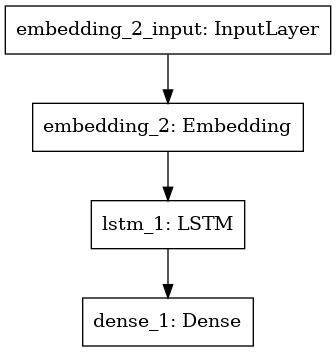

In [44]:
keras.utils.plot_model(model, "rnn.png")

In [45]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [49]:
history = model.fit(
    train_padded, 
    train_labels, 
    epochs=20, 
    validation_data=(val_padded, val_labels),
    verbose=1
)

Epoch 1/20
191/191 [==============================] - 5s 26ms/step - loss: 0.0322 - accuracy: 0.9839 - val_loss: 1.5976 - val_accuracy: 0.7321
Epoch 2/20
191/191 [==============================] - 5s 24ms/step - loss: 0.0341 - accuracy: 0.9821 - val_loss: 1.3502 - val_accuracy: 0.7236
Epoch 3/20
191/191 [==============================] - 5s 24ms/step - loss: 0.0334 - accuracy: 0.9833 - val_loss: 1.5435 - val_accuracy: 0.7426
Epoch 4/20
191/191 [==============================] - 4s 23ms/step - loss: 0.0311 - accuracy: 0.9847 - val_loss: 1.5381 - val_accuracy: 0.7426
Epoch 5/20
191/191 [==============================] - 5s 24ms/step - loss: 0.0310 - accuracy: 0.9865 - val_loss: 1.5174 - val_accuracy: 0.7433
Epoch 6/20
191/191 [==============================] - 5s 25ms/step - loss: 0.0327 - accuracy: 0.9837 - val_loss: 1.4962 - val_accuracy: 0.7039
Epoch 7/20
191/191 [==============================] - 5s 24ms/step - loss: 0.0306 - accuracy: 0.9856 - val_loss: 1.5471 - val_accuracy: 0.7426

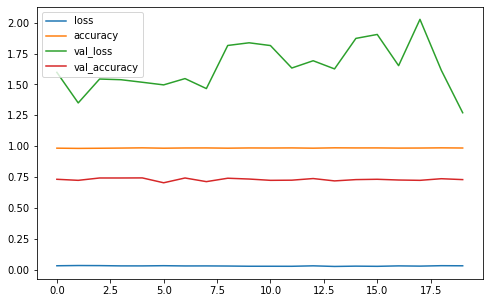

In [51]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [52]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter( y=history.history['val_loss'], name="val_loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history.history['loss'], name="loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history.history['val_accuracy'], name="val accuracy"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter( y=history.history['accuracy'], name="val accuracy"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Loss/Accuracy of LSTM Model"
)

# Set x-axis title
fig.update_xaxes(title_text="Epoch")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Loss", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Accuracy", secondary_y=True)

fig.show()

In [54]:
predictions = model.predict(train_padded)
predictions = [1 if p > 0.5 else 0 for p in predictions]

In [55]:
print(train_sentences[10:20])

print(train_labels[10:20])
print(predictions[10:20])

['three people died heat wave far'
 'haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding'
 'raining flooding florida tampabay tampa 18 19 days ive lost count'
 'flood bago myanmar arrived bago'
 'damage school bus 80 multi car crash breaking' 'whats man' 'love fruits'
 'summer lovely' 'car fast' 'goooooooaaaaaal']
[1 1 1 1 1 0 0 0 0 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


In [58]:
df_sub = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')

In [59]:
df_sub.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [60]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,happened terrible car crash
1,2,NaN,NaN,heard earthquake different cities stay safe ev...
2,3,NaN,NaN,forest fire spot pond geese fleeing across str...
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills 28 china taiwan


In [61]:
df_sub.shape

(3263, 2)

In [62]:
df_test.shape

(3263, 4)

In [63]:
test_sentences = df_test.text.to_numpy()
test_sequences = tokenizer.texts_to_sequences(test_sentences)

In [65]:
test_sequences[:5]

[[708, 1653, 52, 22],
 [363, 235, 952, 3140, 484, 2085, 172],
 [71, 3, 786, 2811, 4252, 697, 577, 1084, 223],
 [303, 4323, 6220, 1070],
 [1812, 2134, 813, 4374, 835, 3381]]

In [66]:
test_padded = pad_sequences(
    test_sequences, 
    maxlen=max_length,
    padding="post", 
    truncating="post"
)
test_padded.shape

(3263, 20)

In [67]:
prediction = model.predict(test_padded)

In [68]:
prediction.shape

(3263, 1)

In [69]:
prediction

array([[9.8696351e-04],
       [7.8240138e-01],
       [9.9950731e-01],
       ...,
       [9.9949998e-01],
       [9.9922335e-01],
       [9.9914503e-01]], dtype=float32)

In [70]:
predictions = [1 if p > 0.5 else 0 for p in prediction]

In [71]:
predictions[:5]

[0, 1, 1, 1, 1]

In [72]:
df_sub.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [74]:
df_sub['target']=predictions

In [75]:
df_sub.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1


In [78]:
df_sub.to_csv('submission.csv',index=False)